## Tải dữ liệu và export ra file csv

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 


{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [7]:
import pandas as pd

data = pd.concat([X,y], axis=1)

print(data)

        HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
0            1         1          1   40       1       0   
1            0         0          0   25       1       0   
2            1         1          1   28       0       0   
3            1         0          1   27       0       0   
4            1         1          1   24       0       0   
...        ...       ...        ...  ...     ...     ...   
253675       1         1          1   45       0       0   
253676       1         1          1   18       0       0   
253677       0         0          1   28       0       0   
253678       1         0          1   23       0       0   
253679       1         1          1   25       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
0                          0             0       0        1  ...            0   
1                          0             1       0        0  ...            1   
2                          0        

In [8]:
data.to_csv('./diabetes_health.csv', index=False)

## Sử dụng Spark để tải dữ liệu

In [1]:
import findspark
findspark.init()

import pyspark
findspark.find()

from pyspark.sql import SparkSession
from pyspark.sql.functions import count

spark = (SparkSession
         .builder
         .appName("Project Classification and Regression")
         .getOrCreate())

In [2]:
DiabetesDF = (spark.read
              .option("HEADER", True)
              .option("inferSchema", True)
              .csv("./diabetes_health.csv"))
DiabetesDF.show(5, truncate=False)

+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+---------------+
|HighBP|HighChol|CholCheck|BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex|Age|Education|Income|Diabetes_binary|
+------+--------+---------+---+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+---+---------+------+---------------+
|1     |1       |1        |40 |1     |0     |0                   |0           |0     |1      |0                |1            |0          |5      |18      |15      |1       |0  |9  |4        |3     |0              |
|0     |0       |0        |25 |1     |0     |0                   |1           |0     |0      |0                |0            |1          |3 

### Giải thích các biến đặc trưng
1. HighBP(High Blood Pressure): Nếu bằng 1 thì bệnh nhân đó có huyết áp cáo. Ngược lại bằng 0 kho bênh nhân huyết apsp bình thường
2. HighChol(High Cholesterol): Nếu bằng 1 thì bệnh nhân đó có lượng Cholesterol cao. Ngược lại bằng 0 thì bệnh nhân có lượng Cholesterol bình thường
3. CholCheck: Nếu bằng 1 là bệnh nhân đó có kiểm tra lượng Cholesterol trong vòng 5 năm. Ngược lại bằng 0 thì bênh nhân đó chưa kiểm tra lượng Cholesterol trong vòng 5 năm
4. BMI(Body Mass Index): Chỉ số khối cơ thể
5. Smoker: Bạn đã hút ít nhất 100 điếu thuốc trong đời chưa? [Lưu ý: 5 gói = 100 điếu] 0 = không 1 = có
6. Stroke: Bệnh nhân đã từng bị đột quỵ hay chưa. Nếu 1 là đã từng bị, 0 thì chưa từng bị.
7. HeartDiseaseorAttack: Đã từng bị bệnh tim mạch vành(CHD) hay bị nhồi máy cơ tim(MI). Nếu bằng 1 thì đã từng bị, 0 thì chưa.
8. PhysActivity: hoạt động thể chất trong 30 ngày qua - không bao gồm công việc 0 = không 1 = có
9. Fruits: Ăn trái cây 1 lần trở lên mỗi ngày 0 = không 1 = có
10. Veggies: Ăn rau 1 lần trở lên mỗi ngày 0 = không 1 = có
11. HvyAlcoholConsump: Người nghiện rượu nặng (đàn ông trưởng thành uống hơn 14 ly mỗi tuần và phụ nữ trưởng thành uống hơn 7 ly mỗi tuần) 0 = không 1 = có
12. AnyHealthcare: Có bất kỳ loại bảo hiểm chăm sóc sức khỏe nào, bao gồm bảo hiểm y tế, các chương trình trả trước như HMO, v.v. 0 = không 1 = có
13. NoDocbcCost: Có thời điểm nào trong 12 tháng qua bạn cần đến gặp bác sĩ nhưng không thể đi khám vì lý do chi phí? 0 = không 1 = có
14. GenHlth: Bạn có cho rằng sức khỏe tổng quát của bạn là: thang điểm 1-5 1 = xuất sắc 2 = rất tốt 3 = tốt 4 = trung bình 5 = kém
15. MentHlth: Bây giờ hãy nghĩ về sức khỏe tâm thần của bạn, bao gồm căng thẳng, trầm cảm và các vấn đề về cảm xúc, sức khỏe tâm thần của bạn không tốt trong bao nhiêu ngày trong 30 ngày qua? quy mô 1-30 ngày
16. PhysHlth: Bây giờ hãy nghĩ về sức khỏe thể chất của bạn, bao gồm bệnh tật và chấn thương thể chất, trong 30 ngày qua sức khỏe thể chất của bạn không tốt trong bao nhiêu ngày? quy mô 1-30 ngày
17. DiffWalk: Bạn có gặp khó khăn nghiêm trọng khi đi bộ hoặc leo cầu thang không? 0 = không 1 = có
18. Sex: 0 = nữ 1 = nam
19. Age: Nhóm tuổi 13 cấp độ (_AGEG5YR xem bảng mã) 1 = 18-24 9 = 60-64 13 = 80 trở lên
20. Education: Trình độ học vấn (EDUCA xem sổ mã) thang điểm 1-6 1 = Chưa bao giờ đi học hoặc chỉ đi học mẫu giáo 2 = Lớp 1 đến lớp 8 (Tiểu học) 3 = Lớp 9 đến lớp 11 (Một số trường trung học) 4 = Lớp 12 hoặc GED (Tốt nghiệp trung học) 5 = Đại học 1 năm đến 3 năm (Một số trường cao đẳng hoặc kỹ thuật) 6 = Đại học 4 năm trở lên (Tốt nghiệp đại học)
21. Imcome: Thang thu nhập (INCOME2 xem sổ mã) thang 1-8 1 = dưới $10.000 5 = dưới $35.000 8 = $75.000 trở lên

### Giải thích biến phân lớp
1. Diabetes_binary: 0 = không mắc bệnh tiểu đường, 1 = tiền tiểu đường hoặc tiểu đường


# 1. Xây dựng mô hình LogisticRegression

## 1.1 Đánh giá mô hình sử dụng Cross Validation Errors

Cross-validation errors: [0.8606228783573967, 0.8599079560611526, 0.8627410813262794, 0.864696959123199, 0.8644951321105601, 0.8641796670461973, 0.864110970563786, 0.8641207600307176, 0.8641059666927043, 0.8641109013062392, 0.8641207501367822, 0.8641158306684784, 0.8641109013062392, 0.8641158306684784, 0.8641109013062392, 0.8641158306684784, 0.8641158306684784, 0.8641158306684784, 0.8641158306684784, 0.8641158306684784, 0.8641158306684784, 0.8606228783573967, 0.8620863049954343, 0.8631060122439155, 0.8634458295094302, 0.8633030100509806, 0.8634064257016582, 0.863352279242862, 0.8634163173422463, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8634261661727894, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.860622878357396

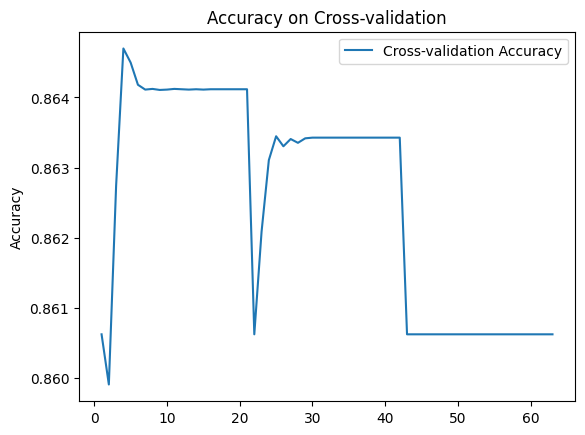

In [22]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt

# Create label
class_indexer = StringIndexer(inputCol = 'Diabetes_binary', outputCol = 'label')

# Crerate a LogisticRegression instance
logist = LogisticRegression(featuresCol="features", labelCol="label")
# Define assembler
assembler = VectorAssembler(inputCols=["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                                       "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
                                       "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"],
                            outputCol="features")
(trainDiabetesDF, testDiabetesDF) = DiabetesDF.randomSplit([.8, .2], seed = 1)

pipeline = Pipeline(stages=[class_indexer, assembler, logist])

# Specify evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol = "label", 
    predictionCol = "prediction",
    metricName = "accuracy"
)

# Specify parameters
paramGrid = (ParamGridBuilder()
            .addGrid(logist.regParam , [0.01, 0.1, 1])
            # Maxiter số lần lặp để cập nhật trọng số
            .addGrid(logist.maxIter, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
            .build())

cv = CrossValidator(estimator=pipeline,
                    evaluator=evaluator,
                    estimatorParamMaps=paramGrid,
                    numFolds=3,
                    parallelism=2,
                    seed=1)
# run cross-validation on training data, and choose the best set of parameters
logistModel = cv.fit(trainDiabetesDF)

cv_results = logistModel.avgMetrics
best_regParam = paramGrid[cv_results.index(max(cv_results))]

print(f"Cross-validation errors: {cv_results}")
print(f"Best accuracy: {max(cv_results)}")
print(f"Best regParam: {best_regParam}")

plt.plot(range(1, len(cv_results) + 1), cv_results, label='Cross-validation Accuracy')
plt.title('Accuracy on Cross-validation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Nhận xét
Sau khi đánh giá mô hình thì nhóm chọn ra bộ siêu tham số cho mô hình LogisticRegression dự trên độ chính xác:

- `accuracy = 0.864696959123199 `
- `regParam = 0.01`
- `maxIter = 3`


## 1.2 Giảm số lượng đặc trưng để đánh giá mô hình LogisticRegression

Cross-validation errors: [0.8606228783573967, 0.8261290662205242, 0.8617554820300927, 0.8638494435769225, 0.8642042649963729, 0.8643522373435895, 0.8639383181072197, 0.8642043092147533, 0.8642191150723497, 0.8642042847842434, 0.8642536113227447, 0.8642141883357586, 0.8642338958907798, 0.864243757240906, 0.8642388377726021, 0.8642388377726021, 0.8642388377726021, 0.8642388377726021, 0.8642388377726021, 0.8642388377726021, 0.8642388377726021, 0.8606228783573967, 0.862667231728489, 0.8631945483278326, 0.8633868063923756, 0.863224287864505, 0.8632932882422387, 0.8632587083887445, 0.8632537764008575, 0.8632537764008575, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8632587083887445, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.860622878357396

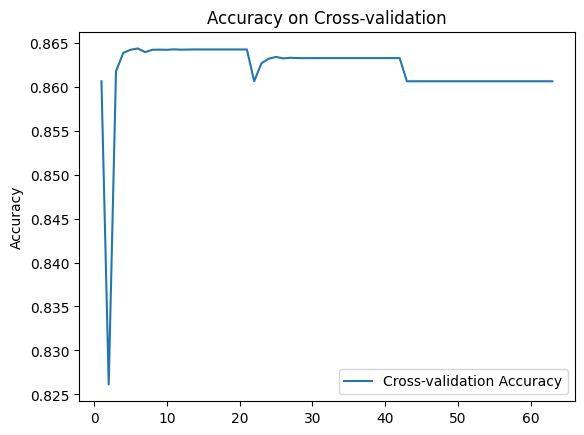

In [16]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt

# Create label
class_indexer = StringIndexer(inputCol = 'Diabetes_binary', outputCol = 'label')

# Crerate a LogisticRegression instance
logist = LogisticRegression(featuresCol="features", labelCol="label")
# Define assembler
assembler = VectorAssembler(inputCols=["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                                       "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", 
                                       "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age"],
                            outputCol="features")
(trainDiabetesDF, testDiabetesDF) = DiabetesDF.randomSplit([.8, .2], seed = 1)

pipeline = Pipeline(stages=[class_indexer, assembler, logist])

# Specify evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol = "label", 
    predictionCol = "prediction",
    metricName = "accuracy"
)

# Specify parameters
paramGrid = (ParamGridBuilder()
            .addGrid(logist.regParam , [0.01, 0.1, 1])
            # Maxiter số lần lặp để cập nhật trọng số
            .addGrid(logist.maxIter, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
            .build())

cv = CrossValidator(estimator=pipeline,
                    evaluator=evaluator,
                    estimatorParamMaps=paramGrid,
                    numFolds=3,
                    parallelism=2,
                    seed=1)
# run cross-validation on training data, and choose the best set of parameters
logistModel = cv.fit(trainDiabetesDF)

cv_results = logistModel.avgMetrics
best_regParam = paramGrid[cv_results.index(max(cv_results))]

print(f"Cross-validation errors: {cv_results}")
print(f"Best accuracy: {max(cv_results)}")
print(f"Best regParam: {best_regParam}")

plt.plot(range(1, len(cv_results) + 1), cv_results, label='Cross-validation Accuracy')
plt.title('Accuracy on Cross-validation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Nhận xét:
Không có sự cải thiện so với việc sử dụng toàn bộ các đặc trưng

## 1.3 Đánh giá mô hình sử dụng Cross Validation Errors và đánh giá nên sử dụng L1 regularization hay L2 regularization hay cả 2

Cross-validation errors: [0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8599079560611526, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8627410813262794, 0.8600213229070518, 0.8605436691600802, 0.860760311124572, 0.8608538714760977, 0.8614550558261547, 0.8617506931999385, 0.864696959123199, 0.8633716245652397, 0.8636079930729448, 0.8636474431160887, 0.8637412035899231, 0.8638646070601129, 0.8638103380311329, 0.8644951321105601, 0.864381772532948, 0.8642388817999603, 0.8642142501339958, 0.8641354701832658, 0.8640517317971473, 0.8637855926626292, 0.8641796670461973, 0.8645687726828072, 0.8644408017009771, 0.8642781856420892, 0.864352135778589, 0.8643224265323788, 0.8640712949771228, 0.864110970563786, 0.8643817093263758, 0.8642684462534903, 0.864248629256525, 0.8642439101015519, 0.8640616208120878, 0.8640467820383814, 

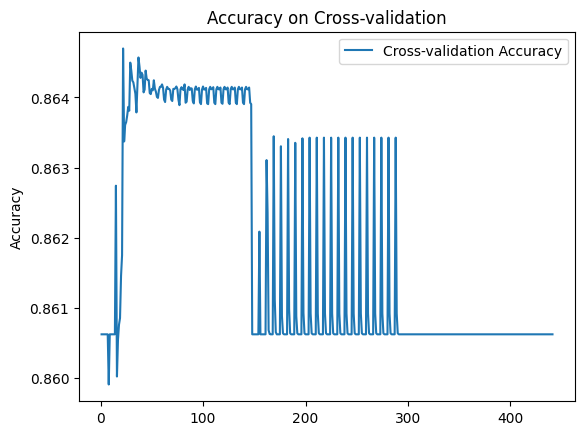

In [17]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt

# Create label
class_indexer = StringIndexer(inputCol = 'Diabetes_binary', outputCol = 'label')

# Crerate a LogisticRegression instance
logist = LogisticRegression(featuresCol="features", labelCol="label")
# Define assembler
assembler = VectorAssembler(inputCols=["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                                       "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
                                       "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"],
                            outputCol="features")
(trainDiabetesDF, testDiabetesDF) = DiabetesDF.randomSplit([.8, .2], seed = 1)

pipeline = Pipeline(stages=[class_indexer, assembler, logist])

# Specify evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol = "label", 
    predictionCol = "prediction",
    metricName = "accuracy"
)

# Specify parameters
paramGrid = (ParamGridBuilder()
            .addGrid(logist.regParam , [0.01, 0.1, 1])
            # Maxiter số lần lặp để cập nhật trọng số
            .addGrid(logist.maxIter, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
            # elasticNetParam = 0 sử dụng L2 regularization
            # elasticNetParam = 1 sử dụng L1 regularization
            # elasticNetParam > 0 & < 1 sử dụng L2, L1 regularization
            .addGrid(logist.elasticNetParam, [0, 0.2, 0.4, 0.5, 0.6, 0.8, 1.0])
            .build())

cv = CrossValidator(estimator=pipeline,
                    evaluator=evaluator,
                    estimatorParamMaps=paramGrid,
                    numFolds=3,
                    parallelism=2,
                    seed=1)
# run cross-validation on training data, and choose the best set of parameters
logistModel = cv.fit(trainDiabetesDF)

cv_results = logistModel.avgMetrics
best_regParam = paramGrid[cv_results.index(max(cv_results))]

print(f"Cross-validation errors: {cv_results}")
print(f"Best accuracy: {max(cv_results)}")
print(f"Best regParam: {best_regParam}")

plt.plot(range(1, len(cv_results) + 1), cv_results, label='Cross-validation Accuracy')
plt.title('Accuracy on Cross-validation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Kết quả sử dụng L2 Regularization

## 1.4 Xây dựng mô hình LogisticRegression

In [18]:
# Create label
class_indexer = StringIndexer(inputCol = 'Diabetes_binary', outputCol = 'label')

# Crerate a LogisticRegression instance
logist = LogisticRegression(featuresCol="features", labelCol="label", regParam=0.01, maxIter=3, elasticNetParam=0)
# Define assembler
assembler = VectorAssembler(inputCols=["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                                       "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
                                       "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"],
                            outputCol="features")
(trainDiabetesDF, testDiabetesDF) = DiabetesDF.randomSplit([.8, .2], seed = 1)

evaluator = MulticlassClassificationEvaluator(
    labelCol = "label", 
    predictionCol = "prediction",
    metricName = "accuracy"
)

pipeline = Pipeline(stages=[class_indexer, assembler, logist])

model = pipeline.fit(trainDiabetesDF)
predictions = model.transform(testDiabetesDF)
result_test = predictions.select("label", "prediction")
result_test.show(10)

+-----+----------+
|label|prediction|
+-----+----------+
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
|  0.0|       0.0|
+-----+----------+
only showing top 10 rows

Accuracy of model on testDiabetDF: 0.8626809165122057


## 1.5 Đánh giá mô hình trên tập test

In [19]:
accuracy_test = evaluator.evaluate(predictions)
print(f"Accuracy of model on testDiabetDF: {accuracy_test}")

Accuracy of model on testDiabetDF: 0.8626809165122057


# 2. Xây dựng mô hình DecisionTreeClassifier

## 2.1 Đánh giá mô hình sử dụng Cross Validation Errors

Cross-validation errors: [0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8611848256526556, 0.8611848256526556, 0.8611848256526556, 0.8635386907101097, 0.8635386907101097, 0.8635386907101097, 0.8654014046639302, 0.8654014046639302, 0.8654014046639302, 0.8652584353881169, 0.8652584353881169, 0.8652584353881169, 0.8652291384884728, 0.8652291384884728, 0.8652291384884728, 0.8644657025201848, 0.8644460246469694, 0.8644410926590823, 0.8640609821223239, 0.8640018859047617, 0.8640068205182967, 0.8618396692240559, 0.8618595211541228, 0.86192846357658, 0.8589571290192569, 0.8588537206368668, 0.8588093307288921, 0.8552287527669581, 0.855277954718284, 0.8554256857680937, 0.8498589395753182, 0.8498540188897014, 0.850105106226577, 0.8448628234679103, 0.8448184699013721, 0.8450745570753465, 0.8388425864161378, 0.8389757949161246, 0.8393893618137863, 0.8328074019839834, 0.832699185592225, 0.832831984788928, 0.8272788165083073, 0.8272543154804924, 0.8275300363093018, 0.8217549164718155, 

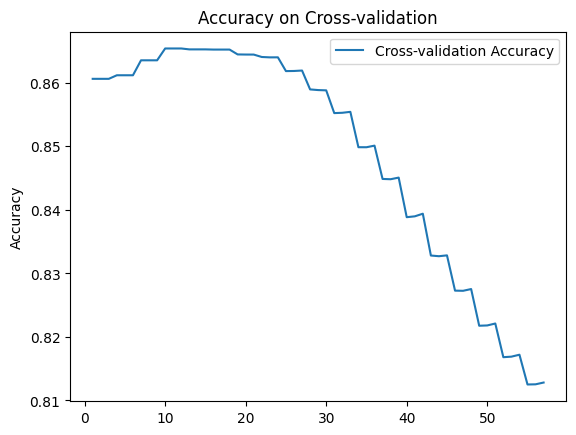

In [28]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt

# Create label
class_indexer = StringIndexer(inputCol = 'Diabetes_binary', outputCol = 'label')

# Crerate a LogisticRegression instance
decTree = DecisionTreeClassifier(featuresCol="features", labelCol="label")
# Define assembler
assembler = VectorAssembler(inputCols=["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                                       "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
                                       "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"],
                            outputCol="features")
(trainDiabetesDF, testDiabetesDF) = DiabetesDF.randomSplit([.8, .2], seed = 1)

pipeline = Pipeline(stages=[class_indexer, assembler, decTree])

# Specify evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol = "label", 
    predictionCol = "prediction",
    metricName = "accuracy"
)

# Specify parameters
paramGrid = (ParamGridBuilder()
            # maxDepth quyết định độ sâu của cây quyết định
            .addGrid(decTree.maxDepth, [2, 3, 4, 5, 6, 7, 8, 9 , 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
            # maxBins kiểm soát số lượng đặc trưng được chia liên tục trong quá trình xây dựng cây > số categories
            .addGrid(decTree.maxBins, [32, 48, 64])
            .build())

cv = CrossValidator(estimator=pipeline,
                    evaluator=evaluator,
                    estimatorParamMaps=paramGrid,
                    numFolds=3,
                    parallelism=2,
                    seed=1)
# run cross-validation on training data, and choose the best set of parameters
decTreeModel = cv.fit(trainDiabetesDF)

cv_results = decTreeModel.avgMetrics
best_regParam = paramGrid[cv_results.index(max(cv_results))]

print(f"Cross-validation errors: {cv_results}")
print(f"Best accuracy: {max(cv_results)}")
print(f"Best regParam: {best_regParam}")

plt.plot(range(1, len(cv_results) + 1), cv_results, label='Cross-validation Accuracy')
plt.title('Accuracy on Cross-validation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 3. Xây dựng mô hình RandomForestClassifier

## 3.1 Đánh giá mô hình sử dụng Cross Validation Errors

Cross-validation errors: [0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.860622878357

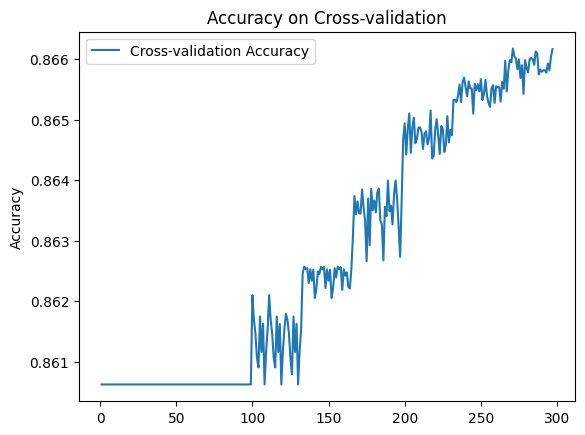

In [3]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt

# Create label
class_indexer = StringIndexer(inputCol = 'Diabetes_binary', outputCol = 'label')

# Crerate a LogisticRegression instance
randomForest = RandomForestClassifier(featuresCol="features", labelCol="label")
# Define assembler
assembler = VectorAssembler(inputCols=["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                                       "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
                                       "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"],
                            outputCol="features")
(trainDiabetesDF, testDiabetesDF) = DiabetesDF.randomSplit([.8, .2], seed = 1)

pipeline = Pipeline(stages=[class_indexer, assembler, randomForest])

# Specify evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol = "label", 
    predictionCol = "prediction",
    metricName = "accuracy"
)

# Specify parameters
paramGrid = (ParamGridBuilder()
            # maxDepth quyết định độ sâu của cây quyết định
            .addGrid(randomForest.maxDepth, [2, 3, 4, 5, 6, 7, 8, 9 , 10])
            # maxBins kiểm soát số lượng đặc trưng được chia liên tục trong quá trình xây dựng cây > số categories
            .addGrid(randomForest.maxBins, [32, 48, 64])
            # Số lượng cây để tại ra một mô hình mạnh mẽ
            .addGrid(randomForest.numTrees, [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
            .build())

cv = CrossValidator(estimator=pipeline,
                    evaluator=evaluator,
                    estimatorParamMaps=paramGrid,
                    numFolds=3,
                    parallelism=2,
                    seed=1)
# run cross-validation on training data, and choose the best set of parameters
randomForestModel = cv.fit(trainDiabetesDF)

cv_results = randomForestModel.avgMetrics
best_regParam = paramGrid[cv_results.index(max(cv_results))]

print(f"Cross-validation errors: {cv_results}")
print(f"Best accuracy: {max(cv_results)}")
print(f"Best regParam: {best_regParam}")

plt.plot(range(1, len(cv_results) + 1), cv_results, label='Cross-validation Accuracy')
plt.title('Accuracy on Cross-validation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 4. Xây dựng mô hình LinearSVC

## 4.1 Đánh giá mô hình sử dụng Cross Validation Errors

Cross-validation errors: [0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8068554811094971, 0.8068554811094971, 0.8068554811094971, 0.8514237313848111, 0.8523403911108006, 0.8511334530730773, 0.8613221574990771, 0.8624849123751751, 0.862977696382687, 0.8641451564858397, 0.8637907918223581, 0.8606524024355071, 0.8644065059549351, 0.8614505714643896, 0.8606228783573967, 0.8638398515710618, 0.8607608603156943, 0.8606228783573967, 0.8633569295223325, 0.8604158671392379, 0.8606228783573967, 0.8602237477808106, 0.8606228783573967, 0.8606228783573967, 0.8608100224646672, 0.8606228783573967, 0.8606228783573967, 0.8603323007929795, 0.8606228783573967, 0.8606228783573967, 0.8605390693053964, 0.8606228783573967, 0.8606228783573967, 0.8606179489951575, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573967, 0.8606228783573

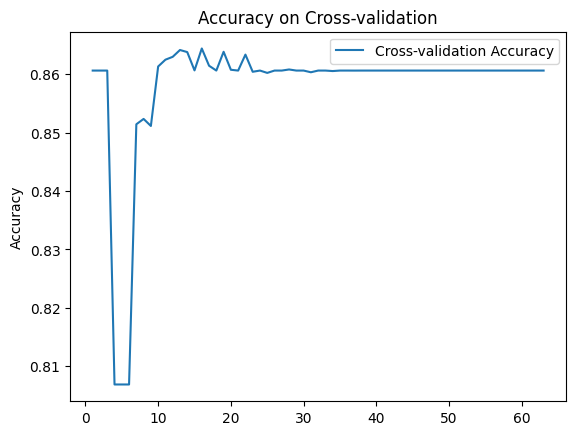

In [14]:
from pyspark.ml.classification import LinearSVC
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer
import matplotlib.pyplot as plt

# Create label
class_indexer = StringIndexer(inputCol='Diabetes_binary', outputCol='label')

# Create a LinearSVC instance
linearSVC = LinearSVC(featuresCol='features', labelCol='label')
# Define assembler
assembler = VectorAssembler(inputCols=["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                                       "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
                                       "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"],
                            outputCol="features")

(trainDiabetesDF, testDiabetesDF) = DiabetesDF.randomSplit([.8, .2], seed=1)

pipeline = Pipeline(stages=[class_indexer, assembler, linearSVC])

# Specify evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol="label",
    predictionCol="prediction",
    metricName="accuracy"
)

# Specify parameters
paramGrid = (ParamGridBuilder()
             # số lần lặp để cập nhật trọng số
             .addGrid(linearSVC.maxIter, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9 , 10,11, 12, 13, 14, 15,16, 17, 18, 19, 20])
             .addGrid(linearSVC.regParam, [0.01, 0.1, 1.0])
             .build())

cv = CrossValidator(estimator=pipeline,
                    evaluator=evaluator,
                    estimatorParamMaps=paramGrid,
                    numFolds=3,
                    parallelism=2,
                    seed=1)

# run cross-validation on training data, and choose the best set of parameters
linearSVCModel = cv.fit(trainDiabetesDF)

cv_results = linearSVCModel.avgMetrics
best_smoothing = paramGrid[cv_results.index(max(cv_results))]

print(f"Cross-validation errors: {cv_results}")
print(f"Best accuracy: {max(cv_results)}")
print(f"Best smoothing value: {best_smoothing}")

plt.plot(range(1, len(cv_results) + 1), cv_results, label='Cross-validation Accuracy')
plt.title('Accuracy on Cross-validation')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 5. So sánh các mô hình

In [39]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, LinearSVC, NaiveBayes, MultilayerPerceptronClassifier, FMClassifier
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StringIndexer

# Create label
class_indexer = StringIndexer(inputCol = 'Diabetes_binary', outputCol = 'label')

# Define assembler
assembler = VectorAssembler(inputCols=["HighBP", "HighChol", "CholCheck", "BMI", "Smoker", "Stroke", "HeartDiseaseorAttack",
                                       "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost",
                                       "GenHlth", "MentHlth", "PhysHlth", "DiffWalk", "Sex", "Age", "Education", "Income"],
                            outputCol="features")

# Define classifiers
classifiers = [
    LogisticRegression(featuresCol="features", labelCol="label"),
    RandomForestClassifier(featuresCol="features", labelCol="label"),
    DecisionTreeClassifier(featuresCol="features", labelCol="label"),
    NaiveBayes(featuresCol="features", labelCol="label" ),
    LinearSVC(featuresCol="features", labelCol="label"),
    FMClassifier(featuresCol="features", labelCol="label"),
    # Máy cùi bị tràng CPU
    # MultilayerPerceptronClassifier(featuresCol="features", labelCol="label", blockSize=128, seed=1234),
]

# Define parameter grids for hyperparameter tuning
paramGrids = [
    ParamGridBuilder().addGrid(LogisticRegression.regParam, [0.01, 0.1, 1]).build(),
    ParamGridBuilder().addGrid(RandomForestClassifier.numTrees, [15, 20, 25]).build(),
    ParamGridBuilder().addGrid(DecisionTreeClassifier.maxDepth, [5, 10]).build(),
    ParamGridBuilder().build(),
    ParamGridBuilder().build(),
    ParamGridBuilder().build()
]

# Specify evaluator
evaluator = MulticlassClassificationEvaluator(
    labelCol = "label", 
    predictionCol = "prediction",
    metricName = "accuracy"
)
(trainDiabetesDF, testDiabetesDF) = DiabetesDF.randomSplit([.8, .2], seed = 1)

pipeline = Pipeline(stages=[class_indexer, assembler])
tranformDF = pipeline.fit(trainDiabetesDF)
TrainDF = tranformDF.transform(trainDiabetesDF)

for classifier, paramGrid in zip(classifiers, paramGrids):
    print(classifier.__class__.__name__)
    if(classifier.__class__.__name__ == "LogisticRegression"):
        paramGridBuilder = ParamGridBuilder().addGrid(classifier.regParam, [0.01, 0.1, 1]).build()
    elif(classifier.__class__.__name__ == "DecisionTreeClassifier"):
        paramGridBuilder = ParamGridBuilder().addGrid(classifier.maxDepth, [5, 10]).build()
    elif(classifier.__class__.__name__ == "RandomForestClassifier"):
        paramGridBuilder = ParamGridBuilder().addGrid(classifier.numTrees, [15, 20, 25]).build()
    elif(classifier.__class__.__name__ == "LinearSVC"):
        paramGridBuilder = ParamGridBuilder().addGrid(classifier.maxIter, [100, 120, 150]).build()
    elif(classifier.__class__.__name__ == "FMClassifier"):
        paramGridBuilder = ParamGridBuilder().addGrid(classifier.maxIter, [100, 120, 150]).build()
    # elif(classifier.__class__.__name__ == "MultilayerPerceptronClassifier"):
    #     paramGridBuilder = ParamGridBuilder().addGrid(classifier.layers, [[4, 5, 4, 3]]).build()
    elif(classifier.__class__.__name__ == "NaiveBayes"):
        paramGridBuilder = ParamGridBuilder().build()

    crossval = CrossValidator(estimator=classifier, 
                              estimatorParamMaps=paramGridBuilder, 
                              evaluator=evaluator, 
                              numFolds=5,
                              parallelism=2,
                              seed=1)
    
    model_Val = crossval.fit(TrainDF)
    cv_results = model_Val.avgMetrics
    best_regParam = paramGrid[cv_results.index(max(cv_results))]

    print(f"Cross-validation errors: {cv_results}")
    print(f"Best regParam: {best_regParam}")

LogisticRegression
Cross-validation errors: [0.8641488941226994, 0.8633753477264088, 0.8606214350841948]
Best regParam: {Param(parent='undefined', name='regParam', doc='regularization parameter (>= 0).'): 0.01}
RandomForestClassifier
Cross-validation errors: [0.8611193055900254, 0.861030350949561, 0.8609614319917942]
Best regParam: {Param(parent='undefined', name='numTrees', doc='Number of trees to train (>= 1).'): 15}
DecisionTreeClassifier
Cross-validation errors: [0.8652676086423223, 0.8630902168779226]
Best regParam: {Param(parent='undefined', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 5}
NaiveBayes
Cross-validation errors: [0.7762407943137679]
Best regParam: {}
LinearSVC
Cross-validation errors: [0.8606214350841948, 0.8606214350841948, 0.8606214350841948]
Best regParam: {}


### Nhận xét:
    Kết quả cho thấy mô hình DecisionTreeClassifier cho ra kết quả tốt nhất trong 4 mô hình với chỉ số maxDepth = 5 